# Interval arithmetic

In these examples we will learn how to do arithmetic and find roots using interval arithmetic.

In [8]:
# import Pkg; Pkg.add("IntervalArithmetic")
using IntervalArithmetic
using Plots

We start with a function that is designed to be particularly pathological. It is approximately a parabola with a small log function which is undefined at $x=4/3$. For $x$ very close to $4/3$ the function is negative and the function is positive at all floating point values near $4/3$. Due to limitations of floating point numbers, we can't even evaluate $f$ at exactly $4/3$.

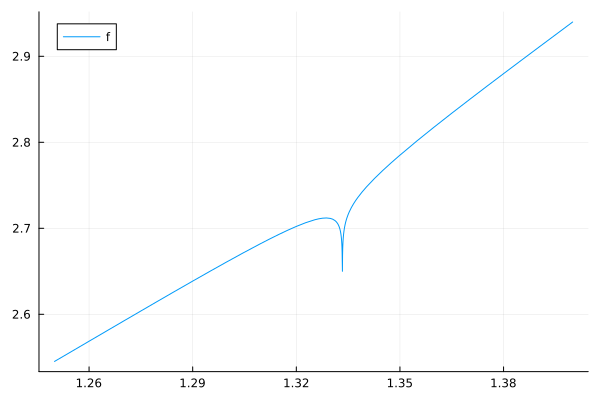

In [14]:
f(x) = 1/80 * log(abs(3*(1 - x) + 1)) + x^2 + 1
plot(f, 1.25, 1.4, label = "f")

In [4]:
x = 4/3
@show f(x)

f(x) = 2.327232110413813


2.327232110413813

In [5]:
f(prevfloat(x)), f(nextfloat(x))

(2.344560789927811, 2.335896450170813)

Create an interval and learn about interval arithmetic.

In [17]:
@show a = 1..2;

a = 1 .. 2 = [1, 2]


In [18]:
2 ± 1

[1, 3]

In [19]:
a = @interval(1, 2)
b = interval(1, 2)
c = interval(1)
d = @interval 1
@show a, b, c, d

(a, b, c, d) = ([1, 2], [1, 2], [1, 1], [1, 1])


([1, 2], [1, 2], [1, 1], [1, 1])

In [20]:
@interval sin(0.2)+cos(1.3)-exp(0.4)

[-1.02566, -1.02565]

In [21]:
a = 0.1
@show big(a);

big(a) = 0.1000000000000000055511151231257827021181583404541015625


0.1000000000000000055511151231257827021181583404541015625

In [22]:
correct = big"0.1"
@show correct;

correct = 0.1000000000000000000000000000000000000000000000000000000000000000000000000000002


In [23]:
I = interval(a)
II = @interval 0.1
III = a..a

@show correct ∈ I
@show correct ∈ II
@show correct ∈ III;

correct ∈ I = false
correct ∈ II = true
correct ∈ III = true


true

In [24]:
X = 1..2
Y = 3..4

@show X ∩ Y # typed \cap<TAB>
@show X ∪ Y # TYPED \cup<TAB>
@show X + Y
@show X*Y
@show X^3
@show X/Y;

X ∩ Y = ∅
X ∪ Y = [1, 4]
X + Y = [4, 6]
X * Y = [3, 8]
X ^ 3 = [1, 8]
X / Y = [0.25, 0.666667]


In [25]:
X = 1..2
Y = -1..1
Z = 0..2
@show X/Y
@show X/Z;

X / Y = [-∞, ∞]
X / Z = [0.5, ∞]


In [27]:
@show X-X
@show X/X
@show Z*(X+Y)
@show Z*X+Z*Y;

X - X = [-1, 1]
X / X = [0.5, 2]
Z * (X + Y) = [0, 6]
Z * X + Z * Y = [-2, 6]


In [28]:
@show sin(0..2/3*π)
@show log(-3.. -2)
@show log(-3..2)
@show √(-3..4);

sin(0 .. (2 / 3) * π) = [0, 1]
log(-3 .. -2) = ∅
log(-3 .. 2) = [-∞, 0.693148]
√(-3 .. 4) = [0, 2]


In [29]:
f(x) = (1/80) * log(abs(3*(1 - x) + 1)) + x^2 + 1
x = @interval 4/3
@show f(x);

f(x) = [-∞, 2.3359]


In [30]:
f(x) = x^2+3x-1
X = -2..2
@show f(X)
@show f(-2.. -1.5) ∪ f(-1.5.. 2);

f(X) = [-7, 9]
f(-2 .. -1.5) ∪ f(-1.5 .. 2) = [-5.5, 9]


In [31]:
X1 = IntervalBox(1..2, 2..3, 3..4)
X2 = IntervalBox(1..2, 3..4)
X3 = IntervalBox(1..2, 5)
@show X1
@show X2
@show X3;

X1 = [1, 2] × [2, 3] × [3, 4]
X2 = [1, 2] × [3, 4]
X3 = [1, 2]⁵


In [32]:
X1 = IntervalBox(1..2, 2..3)
X2 = IntervalBox(-1..1, 0..2)
@show X1 + X2
@show sin.(X1);

X1 + X2 = [0, 3] × [2, 5]
sin.(X1) = [0.84147, 1] × [0.14112, 0.909298]


In [27]:
box1 = IntervalBox(X, f1)
box2 = IntervalBox.(X2, f2)

2-element Vector{IntervalBox{2, Float64}}:
 [-2, -1.5] × [-4.75, -1.5]
 [-1.5, 2] × [-5.5, 9]

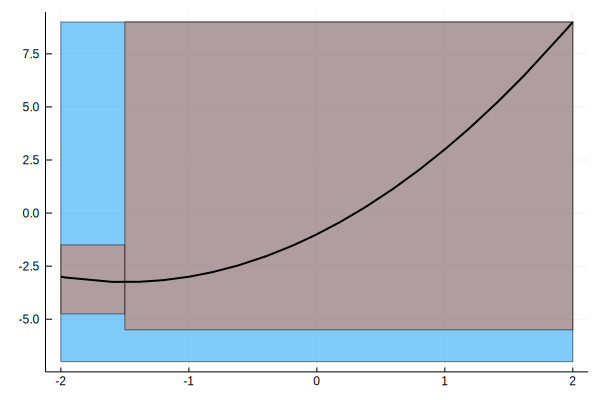

In [28]:
using Plots
plot(box1)
plot!(box2)
plot!(f, -2, 2, leg=false, color=:black, linewidth=2)

https://juliaintervals.github.io/pages/tutorials/tutorialRootFinding/

In [30]:
using IntervalArithmetic, IntervalRootFinding


In [31]:
f(x) = x^2-2x
X = -4..4

rts = roots(f, X) 

2-element Vector{Root{Interval{Float64}}}:
 Root([1.99999, 2.00001], :unique)
 Root([-1.72982e-09, 1.38862e-09], :unique)

In [32]:
roots(f, X, Bisection)

4-element Vector{Root{Interval{Float64}}}:
 Root([2, 2.00001], :unknown)
 Root([1.99999, 2], :unknown)
 Root([-2.3921e-08, 3.24651e-08], :unknown)
 Root([1.99999, 2.00001], :unknown)

In [34]:
h(x) = cos(x) * sin(1 / x)
roots(h, 0.05..1)

6-element Vector{Root{Interval{Float64}}}:
 Root([0.318309, 0.31831], :unique)
 Root([0.0795774, 0.0795775], :unique)
 Root([0.159154, 0.159155], :unique)
 Root([0.0530516, 0.0530517], :unique)
 Root([0.0636619, 0.063662], :unique)
 Root([0.106103, 0.106104], :unique)